In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mask = pd.read_csv('./data/mask_text.csv')
vaccine = pd.read_csv('./data/vaccine_text.csv')

C:\Users\wongc\anaconda3\envs\comp4211\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\wongc\anaconda3\envs\comp4211\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,7,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
vaccine.head()

date             user  \
0  being of the citizens of the planet". #CarlSag...              NaN   
1                                2020-11-02 22:00:39          0Blair0   
2                                2020-11-02 20:46:16  0CT0BERSURPRISE   
3                                2020-11-03 13:26:58  0Gf1lCKkKy0ucqy   
4                                2020-11-03 07:44:24          0Selna0   

  is_retweet is_quote                                               text  \
0        NaN      NaN  USElections2020;USA;USElection2020;COVID19;cor...   
1       True     True  RT @JackPosobiec: The WHO helped China cover u...   
2       True    False  RT @JoeBiden: This is my commitment to you: We...   
3       True    False  RT @HHShkMohd: While receiving the COVID-19 va...   
4       True     True  RT @angie_rasmussen: The most likely scenario ...   

                                         quoted_text                     lat  \
0                                                NaN  1.3233829940993188e+18   
1  China extracted concessions from the WHO that ...                     NaN   
2                                                NaN                     NaN   
3                                                NaN                     NaN   
4  This long New York Times story on China’s refu...                     NaN   

  long  hts mentions                     tweet_id likes  retweets  replies  \
0  0.0    0        0                          0.0   NaN       NaN      NaN   
1  NaN  NaN      NaN       1.3233845543678894e+18   0.0       0.0      0.0   
2  NaN  NaN      NaN        1.323365833528103e+18   0.0       0.0      0.0   
3  NaN  NaN      NaN          1323617667178205186     0       0.0      0.0   
4  NaN  NaN      NaN          1323531459957719042     0       0.0      0.0   

   quote_count  original_tweet_id  
0          NaN                NaN  
1          0.0       1.323384e+18  
2          0.0       1.323291e+18  
3          0.0       1.323543e+18  
4          0.0       1.323448e+18

In [4]:
user = vaccine['user']
mentions = vaccine['mentions']
nona = mentions.notna()
truehts = mentions[nona].reset_index(drop=True)
for i in range(len(truehts)):
    truehts[i] = truehts[i].lower()

In [5]:
htcount = list()
for i in range(len(truehts)):
    for j in range(len(truehts[i].split(';'))):
        htcount.append(truehts[i].split(';')[j])

In [6]:
htfreq = [htcount.count(ht) for ht in htcount]
htdict = dict(list(zip(htcount, htfreq)))
sorted_ht = sorted(htdict.items(), key = lambda k: k[1], reverse=True)

In [7]:
ht_list = []
for i in range(200):
    ht_list.append(sorted_ht[i][0])

In [8]:
user_vac = vaccine.groupby(['user'])
ht_set = set(ht_list)

In [9]:
import re
def extract_ht(text):
    ht_extracted = re.findall(r"@(\w+)", text)
    return [x.lower() for x in ht_extracted]

In [10]:
ht_vectors = []
vector_user_index = {}
vector_ind = 0
for name, group in user_vac:
   # if len(group) < 4:
   #     continue
    
    vector_user_index[vector_ind] = name
    vector_ind += 1
    
    user_ht_vector = [0.0]*len(ht_list)
    
    user_tweets = group['text'].tolist()
    extracted_hts = set(extract_ht(' '.join(user_tweets)))
    
    matching_hts = list([x for x in extracted_hts if x in ht_set])
    if len(matching_hts) == 0:
        continue
    for mht in matching_hts:
        m_index = ht_list.index(mht)
        user_ht_vector[m_index]+=1
        
    ht_vectors.append(user_ht_vector)

In [11]:
len(ht_vectors[1])

200

In [16]:
ht_vectors

,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [22]:
G = nx.Graph()

In [23]:
G.remove_nodes_from(list(nx.isolates(G)))
G.number_of_nodes(), G.number_of_edges()

(0, 0)

In [24]:
nx.write_gexf(G, "co_hashtag.gexf")

In [12]:
from embedding import Embedding

In [13]:
emb = Embedding(ht_vectors)
emb.dimReduce()
# emb.cluster()
# emb.plot(n2v.graph)
# emb.evaluate_dimReduce(n2v.valid_edges, n2v.false_edges)

In [15]:
emb.cluster()

<AxesSubplot:>

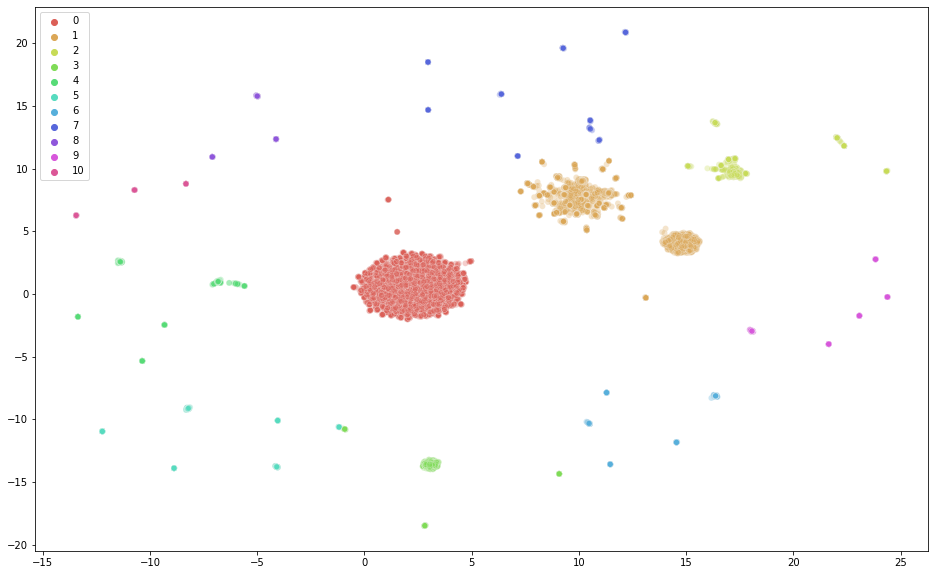

In [18]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=emb.get_nodes_pos()[:,0], y=emb.get_nodes_pos()[:,1],
    hue=emb.get_nodes_cluster(),
    palette=sns.color_palette("hls", 11),
    # data=df_subset,
    legend="full",
    alpha=0.3)